# Import Library

In [6]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# 1. Muat Data

In [7]:
df = pd.read_csv('data.csv')

print("--- 5 Baris Data Awal (data.csv) ---")
print(df.head().to_markdown(index=False))
print("\n--- Ringkasan Informasi Data ---")
df.info()

# hapus kolom tdk di inignkan
df = df.drop(columns=['Customer_ID', 'Nama', 'Tanggal_Registrasi'])

X = df.drop('Beli_Windows', axis=1) # Fitur
y = df['Beli_Windows'] # Target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

--- 5 Baris Data Awal (data.csv) ---
| Customer_ID   | Nama                      |   Usia | Pekerjaan   |   Penghasilan_Bulanan_Juta |   Kemampuan_Teknologi |   Kebutuhan_Bisnis |   Beli_Windows | Tanggal_Registrasi   |
|:--------------|:--------------------------|-------:|:------------|---------------------------:|----------------------:|-------------------:|---------------:|:---------------------|
| CUST10000     | Tiara Hutapea, M.Pd       |     59 | Akuntan     |                      15.74 |                  0.2  |               0.81 |              0 | 2025-09-30           |
| CUST10001     | Zelaya Mulyani            |     58 | Hotel Staff |                       5.86 |                  0    |               0.74 |              0 | 2025-06-04           |
| CUST10002     | Hj. Yessi Kuswandari      |     27 | Dokter      |                      26.59 |                  0.54 |               0.89 |              1 | 2025-07-18           |
| CUST10003     | Hj. Cinthia Mulyani       |   

# 2. Pipiline PrePocessing

In [8]:
numerical_features = ['Usia', 'Penghasilan_Bulanan_Juta', 'Kemampuan_Teknologi', 'Kebutuhan_Bisnis']
categorical_features = ['Pekerjaan'] 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 
         Pipeline([
             ('imputer', SimpleImputer(strategy='mean')), 
             ('scaler', StandardScaler()) 
         ]), 
         numerical_features),
        
        ('cat', 
         Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')), 
             ('onehot', OneHotEncoder(handle_unknown='ignore')) 
         ]), 
         categorical_features)
    ],
    remainder='passthrough'
)

# 3. Melatih dan Membandingkan Model


       IMPLEMENTASI & EVALUASI: RANDOM FOREST
AKURASI Random Forest: 0.8081

Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1280
           1       0.80      0.67      0.73       820

    accuracy                           0.81      2100
   macro avg       0.81      0.78      0.79      2100
weighted avg       0.81      0.81      0.80      2100



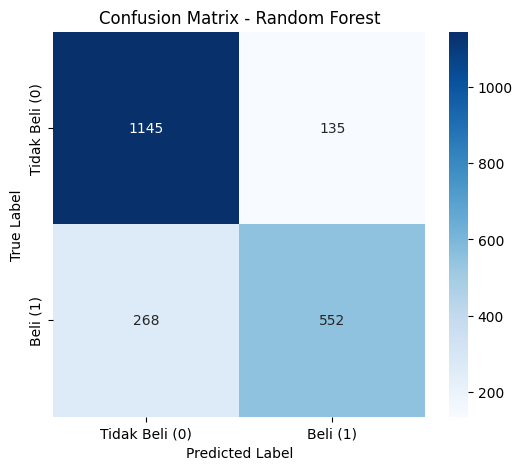

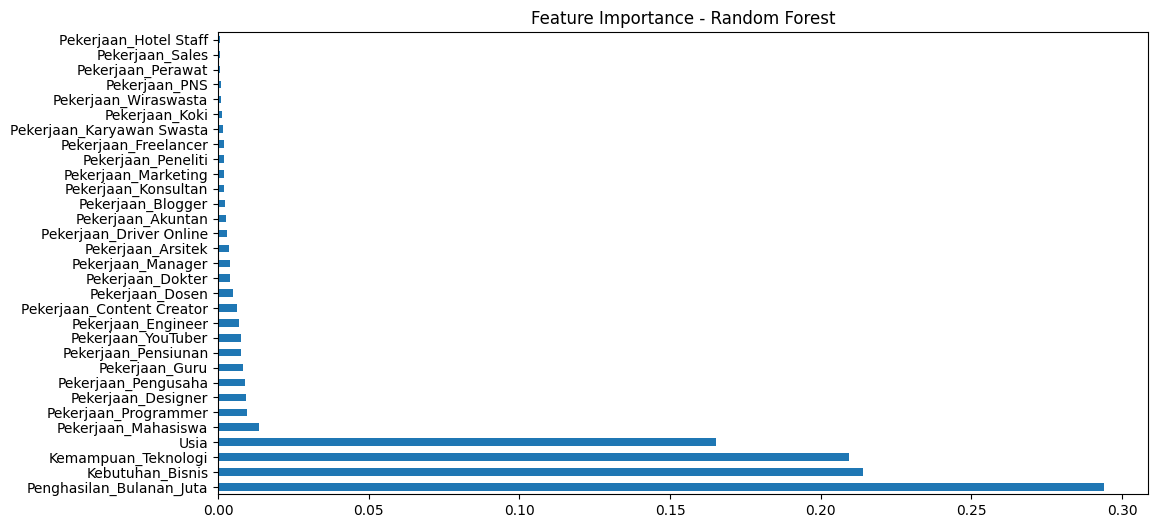

In [9]:
print("\n" + "="*50)
print("       IMPLEMENTASI & EVALUASI: RANDOM FOREST")
print("="*50)

# Membuat Pipeline RF (Gabungkan Preprocessing dan Classifier)
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42))])

# Latih Model RF
pipeline_rf.fit(X_train, y_train)

# Prediksi & Evaluasi RF
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"AKURASI Random Forest: {accuracy_rf:.4f}")
print("\nLaporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix RF (POIN 5 UAS)
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Beli (0)', 'Beli (1)'], 
            yticklabels=['Tidak Beli (0)', 'Beli (1)'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualisasi Feature Importance RF (Interpretasi Model)
rf_classifier = pipeline_rf.named_steps['classifier']

# Karena ada OHE, kita harus mengambil nama fitur yang benar
# Ini adalah teknik tingkat lanjut untuk mendapatkan nama fitur yang dihasilkan OHE
feature_names = numerical_features + list(pipeline_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))

feature_importance = pd.Series(rf_classifier.feature_importances_, index=feature_names)

plt.figure(figsize=(12, 6))
feature_importance.sort_values(ascending=False).plot(kind='barh')
plt.title("Feature Importance - Random Forest")
plt.show()

# Simpan Model

In [10]:
# Menyimpan Model Random Forest (Pipeline Lengkap)
joblib.dump(pipeline_rf, 'data.pkl')
print("\n" + "="*50)
print("Model Random Forest berhasil disimpan sebagai 'data.pkl'")
print("="*50)


Model Random Forest berhasil disimpan sebagai 'data.pkl'
